
# Proyecto Final Data Analysis

## Analisis comercial para América Móvil

## Objetivo: 

Realizar el análisis de la información comercial de América Móvil contenido para Claro Video con la finalidad de
    encontrar insights que nos ayuden a generar acciones y estrategias que ayuden al negocio.

## Información: 
 
 Se cuenta con un dataset que contiene información referente a los indicadores más importantes de dicha aplicacion
 para México y Lationamérica.

## Procedimiento

Lectura de los datos:

Lo primero que tenemos que hacer es importar las que ocuparemos: CSV, Numpy, Pandas y Matplotlib para leer nuestro archivo CSV y definirlo como nuestro dataframe.

In [2]:
#Importamos Numpy, pandas y matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

#Leemos el csv para convertirlo en nuestra variable que será nuestro dataframe
dfClaroVD = pd.read_csv('C:/Users/marti/Desktop/Python-Curso/Claro-Video.csv')
dfClaroVD.head()

c:\users\marti\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,NOMBRE_METRICA,FECHA_INFO,PAIS,ABONO,SEMANA,MEDIO_PAGO_NOMBRE,CANTIDAD,N_USUARIOS,canal,fecha_min,fecha_max,TX_DISP_CATEGORIA_ORIGINAL,modelo,medio_pago_homologado,tipo_reporte,TX_DISP_CATEGORIA_HOMOLOGADA,País Homologado,FECHA,AÑO,MES
0,Visualizaciones,20180831,ELSALVADOR,CRACKLE - Premium - 30 días,20180831.0,Fija,37,7.0,Crackle,NaN,NaN,web,Otros,Fija,M,web,El Salvador,31/08/2018,2018,AGOSTO
1,Visualizaciones,20180831,ELSALVADOR,CRACKLE - Premium - 30 días,20180831.0,Móvil,6,3.0,Crackle,NaN,NaN,tv,No Especificado,Móvil,M,tv,El Salvador,31/08/2018,2018,AGOSTO
2,Visualizaciones,20180831,ELSALVADOR,NOGGIN - Premium - 30 días,20180831.0,Fija,41,2.0,Nog,NaN,NaN,NaN,No Especificado,Fija,M,0,El Salvador,31/08/2018,2018,AGOSTO
3,Visualizaciones,20180831,ELSALVADOR,NOGGIN - Premium - 30 días,20180831.0,Fija,2,1.0,Nog,NaN,NaN,tablet,android,Fija,M,tablet,El Salvador,31/08/2018,2018,AGOSTO
4,Visualizaciones,20180831,ELSALVADOR,NOGGIN - Premium - 30 días,20180831.0,Fija,4,1.0,Nog,NaN,NaN,tablet,Apple,Fija,M,tablet,El Salvador,31/08/2018,2018,AGOSTO


 a) Conocimiento del dataframe

In [3]:
# Vemos que nuestro dataframe contiene 161,355 filas y 20 columnas

dfClaroVD.shape

(161355, 20)

In [4]:
# Vemos el número de registros por cada columna.
# Así podemos ver que no todas las columnas tienen el mismo número de registros y esto es debido a la forma de cubo que tiene
# nuestro dataframe.
dfClaroVD.count()

NOMBRE_METRICA                  161355
FECHA_INFO                      161355
PAIS                            161355
ABONO                           123899
SEMANA                          161166
MEDIO_PAGO_NOMBRE               143688
CANTIDAD                        161206
N_USUARIOS                      157047
canal                           149233
fecha_min                        17900
fecha_max                        17900
TX_DISP_CATEGORIA_ORIGINAL      128309
modelo                          133196
medio_pago_homologado           161355
tipo_reporte                    161355
TX_DISP_CATEGORIA_HOMOLOGADA    133196
País Homologado                 161355
FECHA                           161355
AÑO                             161355
MES                             161355
dtype: int64

In [5]:
# Asi mismo identificamos el tipo de datos de cada columna para tenerlo en cuenta antes de realizar algún cálculo
dfClaroVD.dtypes

NOMBRE_METRICA                   object
FECHA_INFO                        int64
PAIS                             object
ABONO                            object
SEMANA                          float64
MEDIO_PAGO_NOMBRE                object
CANTIDAD                         object
N_USUARIOS                      float64
canal                            object
fecha_min                       float64
fecha_max                       float64
TX_DISP_CATEGORIA_ORIGINAL       object
modelo                           object
medio_pago_homologado            object
tipo_reporte                     object
TX_DISP_CATEGORIA_HOMOLOGADA     object
País Homologado                  object
FECHA                            object
AÑO                               int64
MES                              object
dtype: object

In [6]:
# Analizamos la columna "NOMBRE_METRICA" que contiene las medidas mientras que las demás columnas
# nos indican las distintas dimensiones
pd.value_counts(dfClaroVD['NOMBRE_METRICA'])

Visualizaciones      133196
Bajas                 12328
Altas                  5572
Suscripciones          5012
Activos 30 días        1193
Rentas                  850
Bundle                  577
Stand Alone             577
Universo                556
Empaquetados            556
Periodo de Prueba       528
Usuarios Anónimos       320
Compras                  90
Name: NOMBRE_METRICA, dtype: int64

b) Procesamiento de la información

In [7]:
# Comenzaremos por analizar la metrica de visualizaciones ya que es una de las más importantes
# Aislamos este indicador mediante una matriz boleana

visCV = dfClaroVD['NOMBRE_METRICA'] == 'Visualizaciones'
visCV.head()

0    True
1    True
2    True
3    True
4    True
Name: NOMBRE_METRICA, dtype: bool

In [8]:
# Después generamos un nuevo dataset que sólo contiene visualizaciones

Visualizaciones = dfClaroVD[visCV]
Visualizaciones.head()

,NOMBRE_METRICA,FECHA_INFO,PAIS,ABONO,SEMANA,MEDIO_PAGO_NOMBRE,CANTIDAD,N_USUARIOS,canal,fecha_min,fecha_max,TX_DISP_CATEGORIA_ORIGINAL,modelo,medio_pago_homologado,tipo_reporte,TX_DISP_CATEGORIA_HOMOLOGADA,País Homologado,FECHA,AÑO,MES
0,Visualizaciones,20180831,ELSALVADOR,CRACKLE - Premium - 30 días,20180831.0,Fija,37,7.0,Crackle,NaN,NaN,web,Otros,Fija,M,web,El Salvador,31/08/2018,2018,AGOSTO
1,Visualizaciones,20180831,ELSALVADOR,CRACKLE - Premium - 30 días,20180831.0,Móvil,6,3.0,Crackle,NaN,NaN,tv,No Especificado,Móvil,M,tv,El Salvador,31/08/2018,2018,AGOSTO
2,Visualizaciones,20180831,ELSALVADOR,NOGGIN - Premium - 30 días,20180831.0,Fija,41,2.0,Nog,NaN,NaN,NaN,No Especificado,Fija,M,0,El Salvador,31/08/2018,2018,AGOSTO
3,Visualizaciones,20180831,ELSALVADOR,NOGGIN - Premium - 30 días,20180831.0,Fija,2,1.0,Nog,NaN,NaN,tablet,android,Fija,M,tablet,El Salvador,31/08/2018,2018,AGOSTO
4,Visualizaciones,20180831,ELSALVADOR,NOGGIN - Premium - 30 días,20180831.0,Fija,4,1.0,Nog,NaN,NaN,tablet,Apple,Fija,M,tablet,El Salvador,31/08/2018,2018,AGOSTO


In [9]:
# Ahora el tamaño de la nueva variable cambia y comprobamos que sólo trae el KPI de Visualizaciones 

Visualizaciones.shape

(133196, 20)

In [10]:
# Identificamos que la columna que nos ayudará a calcular las diferentes metricas es 'CANTIDAD', sin embargo, es de clase objeto
# Por lo que tendremos que convertirla a entero; al mismo tiempo traemos 'PAIS'.

Canok = Visualizaciones['CANTIDAD'].astype('int64')
Paisok = Visualizaciones['PAIS']


In [11]:
# La conversión anterior nos dio como resultado listas por lo que las convertirenos País y Cantidad a un arreglo de numpy para
# determinar el número de visualizaciones por país.
NuevoDF = np.array([[Paisok], [Canok]])
NuevoDF = NuevoDF.T
NuevoDF

array([[['ELSALVADOR', 37]],

       [['ELSALVADOR', 6]],

       [['ELSALVADOR', 41]],

       ...,

       [['URUGUAY', 6]],

       [['URUGUAY', 408]],

       [['URUGUAY', 210]]], dtype=object)

In [12]:
#Las convertimos a un nuevo dataframe

Cantidades = pd.DataFrame(NuevoDF[:, 0])
Cantidades.columns = ['Pais', 'Visualizaciones (mill)']
Cantidad = Cantidades['Visualizaciones (mill)'].astype('int64')
Cantidades = pd.DataFrame(Cantidades)
Cantidades

,Pais,Visualizaciones (mill)
0,ELSALVADOR,37
1,ELSALVADOR,6
2,ELSALVADOR,41
3,ELSALVADOR,2
4,ELSALVADOR,4
...,...,...
133191,URUGUAY,17
133192,URUGUAY,5
133193,URUGUAY,6
133194,URUGUAY,408


c) Visualización de los datos

In [13]:
# Agrupamos la información por país obteniendo el número total de visualizaciones para cada uno y su participación correspondiente.

Tabla1= Cantidades.groupby(['Pais']).sum() / 1000000
TablaSort = Tabla1['Visualizaciones (mill)'].sort_values(ascending=False).round().astype('int64')
SortDF = pd.DataFrame(TablaSort)
Share = (SortDF['Visualizaciones (mill)'] / SortDF['Visualizaciones (mill)'].sum() * 100).round().astype('int64')
SortDF['Share %'] = Share
SortDF.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])


,Visualizaciones (mill),Share %
Pais,,
MEXICO,1031,86
COLOMBIA,62,5
ARGENTINA,31,3
PERU,26,2
BRASIL,17,1
CHILE,13,1
ECUADOR,6,1
ELSALVADOR,4,0
GUATEMALA,2,0


Interpretación

En dicha tabla podemos ver las visualizaciones totales divididas en millones para una mejor presentación de los datos así como su porcentaje. Vemos que México tiene el 86%, seguido de Colombia 5%, Argentina 3%

In [14]:
# A continuación se realiza la tabla correspondiente para cada tipo de dispositivo

Canok = Visualizaciones['CANTIDAD'].astype('int64')
Disp = Visualizaciones['TX_DISP_CATEGORIA_ORIGINAL'].astype('str')
DispNP = np.array([[Disp], [Canok]])
DispNP = DispNP.T
DispDF = pd.DataFrame(DispNP[:, 0])
DispDF.columns = ['Dispositivo', 'Visualizaciones (mill)']
#DispDF = pd.DataFrame(DispDF)
Tabla2= DispDF.groupby(['Dispositivo']).sum() / 1000000
TablaSort2 = Tabla2['Visualizaciones (mill)'].sort_values(ascending=False).round().astype('int64')
SortDF2 = pd.DataFrame(TablaSort2)
Share2 = (SortDF2['Visualizaciones (mill)'] / SortDF2['Visualizaciones (mill)'].sum() * 100).round().astype('int64')
SortDF2['Share %'] = Share2
SortDF2 = SortDF2.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
SortDF2

,Visualizaciones (mill),Share %
Dispositivo,,
tv,377,31
stb,349,29
mobile,253,21
web,92,8
tablet,60,5
nan,43,4
console,24,2


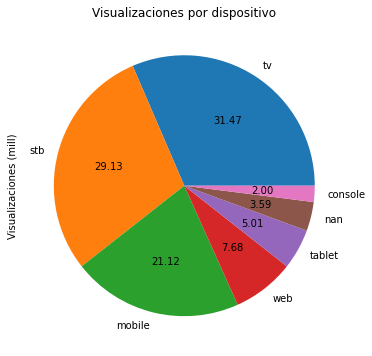

In [15]:
# Para visualizar mejor estos datos se hace uso de una gráfica de pie


plot = TablaSort2.plot(kind='pie', autopct='%.2f', figsize=(6, 6), title='Visualizaciones por dispositivo')

Interpretación

Con base en esta información podemos segmentar nuestras estrategias digitales para fomentar el uso de la plataforma.

In [16]:
# Ahora se rrequiere tener las visualizaciones por modelo y/o marca


Modelo = Visualizaciones['modelo'].astype('str')
ModNP = np.array([[Modelo], [Canok]])
ModNP = ModNP.T
ModDF = pd.DataFrame(ModNP[:, 0])
ModDF.columns = ['Modelo', 'Visualizaciones (mill)']
Tabla3= ModDF.groupby(['Modelo']).sum() / 1000000
TablaSort3 = Tabla3['Visualizaciones (mill)'].sort_values(ascending=False).round().astype('int64')
SortDF3 = pd.DataFrame(TablaSort3)
Share3 = (SortDF3['Visualizaciones (mill)'] / SortDF3['Visualizaciones (mill)'].sum() * 100).round().astype('int64')
SortDF3['Share %'] = Share3
SortDF3.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

,Visualizaciones (mill),Share %
Modelo,,
coship,269,22
android,244,20
samsung,155,13
lg,124,10
No Especificado,113,9
Otros,92,8
Apple,57,5
hisense,43,4
Otros,32,3


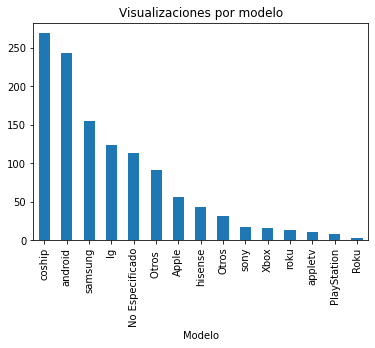

In [49]:
# Para esta tabla se hace uso de una gráfica de barras

plot3 = TablaSort3.plot(kind='bar', title='Visualizaciones por modelo')

Interpretación

Así mismo es importante identificar nuestras vizualizaciones por el modelo para enfocar los esfuerzos de mejoras en los que más
nos signifiquen como compañia.

In [150]:
# Tambien se necesita representar el número de suscripciones por país así como su peso porcentual

Susc = dfClaroVD['NOMBRE_METRICA'] == 'Suscripciones'
Suscripciones = dfClaroVD[Susc]
SusCan = Suscripciones['CANTIDAD'].isnull()==False
SusOk = Suscripciones[SusCan]
SusCanOk = SusOk['CANTIDAD'].astype('int64')
SusPais = SusOk['PAIS']
SusNP = np.array([[SusPais], [SusCanOk]])
SusNP = SusNP.T
SusDF = pd.DataFrame(SusNP[:, 0])
SusDF.columns = ['Pais', 'Suscripciones (mill)']
TablaSus= SusDF.groupby(['Pais']).sum() / 1000000
TablaSusSort = (TablaSus['Suscripciones (mill)'].sort_values(ascending=False)).astype('int64')
SortSusDF = pd.DataFrame(TablaSusSort)
SortSusDF
ShareSus = (SortSusDF['Suscripciones (mill)'] / SortSusDF['Suscripciones (mill)'].sum() * 100).astype('int64')
SortSusDF['Share %'] = ShareSus
SortSusDF.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

,Suscripciones (mill),Share %
Pais,,
MEXICO,128,73
COLOMBIA,15,8
CHILE,9,5
BRASIL,9,5
PERU,6,3
ARGENTINA,2,1
ELSALVADOR,2,1
DOMINICANA,1,0
GUATEMALA,1,0


Interpretación

Otro indicador no menos importante son el número de suscripciones pues está directamente relacionado con la monetización para la empresa.

Observamos que en este caso el share de México disminuye respecto a visualizaciones de 86% a 73% con lo que podemos concluir que necesitamos impulsar el uso de la aplicación en los demás países.

In [129]:
# Posteriormente se requiere saber las suscripciones por medio de pago

Susmed = SusOk['medio_pago_homologado']
SusmedNP = np.array([[Susmed], [SusCanOk]])
SusmedNP = SusmedNP.T
SusmedDF = pd.DataFrame(SusmedNP[:, 0])
SusmedCorr = SusmedDF[0] == 'móvil'
SusmedDF.columns = ['Medio de pago', 'Suscripciones (mill)']
TablamedSus= SusmedDF.groupby(['Medio de pago']).sum() / 1000000
TablamedSusSort = (TablamedSus['Suscripciones (mill)'].sort_values(ascending=False)).astype('int64')
TablamedSusSortDF = pd.DataFrame(TablamedSusSort)
SharemedSus = (TablamedSusSortDF['Suscripciones (mill)'] / TablamedSusSortDF['Suscripciones (mill)'].sum() * 100).astype('int64')
TablamedSusSortDF['Share %'] = SharemedSus
TablamedSusSortDF.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])


,Suscripciones (mill),Share %
Medio de pago,,
Fija,138,77
Móvil,40,22
móvil,1,0


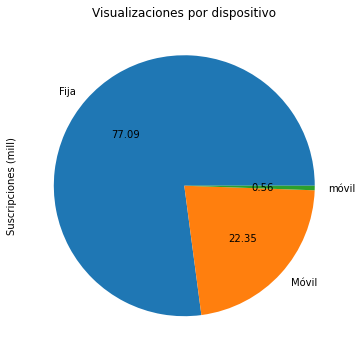

In [152]:
# Visualizamos la participación de las suscripciones por medio de pago en una gráfica de pie

plot = TablamedSusSort.plot(kind='pie', autopct='%.2f', figsize=(6, 6), title='Visualizaciones por dispositivo')

Interpretación

Aquí podemos observar que el medio de pago más importante es la telefonía fija con un 77% mientras que la móvil aport un 23%.

Una oportunidad en este sentido sería atraer más clientes de telefonía móvil mediante news letters con alguna promoción
o mediante contenido relevante de la aplicación.

Los datos anteriores son datos acumulados en tres años, lo que nos da un panorama general, sin embargo, es necesario llevar
separar los datos por periodo de tiempo por lo que a continuación separaremos el dataset en años y mes para sacar las cantidades correspondientes a un mes en específico, en este caso tomaremos el mes de Febrero del  2020.

In [316]:
# Ahora procedemos a separar las suscripciones por año y para el mes de febrero.

Susc = dfClaroVD['NOMBRE_METRICA'] == 'Suscripciones'
Suscripciones = dfClaroVD[Susc]

Susc18 = Suscripciones['AÑO'] == 2018
Suscripciones18 = Suscripciones[Susc18]

Susc19 = Suscripciones['AÑO'] == 2019
Suscripciones19 = Suscripciones[Susc19]

Susc20 = Suscripciones['AÑO'] == 2020
Suscripciones20 = Suscripciones[Susc20]

Susc20Feb = Suscripciones20['MES'] =='FEBRERO'
Suscripciones20Feb = Suscripciones20[Susc20Feb]
SusCan20Feb = Suscripciones20Feb['CANTIDAD'].isnull()==False
SusOk20Feb = Suscripciones20Feb[SusCan20Feb]
SusOk20FebQ = SusOk20Feb['CANTIDAD'].astype('int64')
SusPais20Feb = SusOk20Feb['PAIS']
Sus20FebNP = np.array([[SusPais20Feb], [SusOk20FebQ]])
Sus20FebNP = Sus20FebNP.T
Sus20Febdf = pd.DataFrame(Sus20FebNP[:, 0])
Sus20Febdf
Sus20Febdf.columns = ['Pais', 'Suscripciones (mill)']
Tabla8 = Sus20Febdf.groupby(['Pais']).sum()
Tabla8Sort = (Tabla8['Suscripciones (mill)'].sort_values(ascending=False)).astype('int64')
Tabla8SortDF = pd.DataFrame(Tabla8Sort)
Tabla8SortDF['Visualizaciones (mill)'] = Tabla9SortDF
Tabla8SortDF1 = (Tabla8SortDF['Visualizaciones (mill)'] / Tabla8SortDF['Suscripciones (mill)']).astype('int64')
Tabla8SortDF['Vis x Suscriptor'] = Tabla8SortDF1
Tabla8SortDF.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

,Suscripciones (mill),Visualizaciones (mill),Vis x Suscriptor
Pais,,,
MEXICO,6805911,42809138,6
COLOMBIA,1148150,4051087,3
CHILE,666157,488321,0
BRASIL,619083,765066,1
PERU,344286,1059184,3
ARGENTINA,270639,1546922,5
ELSALVADOR,225726,222057,0
GUATEMALA,95690,134966,1
ECUADOR,88711,412683,4


En este última tabla calculamos las visualizaciones por suscriptor con lo que podemos determinar que en paises como
Brasil y Guatemala debemos de incrementar las visualizaciones.

In [298]:
# De igual forma para las suscripciones hacemos la partición de datos en años y el mes de Febrero
# Posteriormente la pegamos a la tabla anterior para tener los datos en una sola tabla. 

Visc18 = Visualizaciones['AÑO'] == 2018
Visualizaciones18 = Visualizaciones[Visc18]

Visc19 = Visualizaciones['AÑO'] == 2019
Visualizaciones19 = Visualizaciones[Visc19]

Visc20 = Visualizaciones['AÑO'] == 2020
Visualizaciones20 = Visualizaciones[Visc20]

Visc20Feb = Visualizaciones20['MES'] =='FEBRERO'
Visualizaciones20Feb = Visualizaciones20[Visc20Feb]

VisOk20FebQ = Visualizaciones20Feb['CANTIDAD'].astype('int64')
VisPais20Feb = Visualizaciones20Feb['PAIS']
Vis20FebNP = np.array([[VisPais20Feb], [VisOk20FebQ]])
Vis20FebNP = Vis20FebNP.T
Vis20Febdf = pd.DataFrame(Vis20FebNP[:, 0])
Vis20Febdf
Vis20Febdf.columns = ['Pais', 'Visualizaciones (mill)']
Tabla9 = Vis20Febdf.groupby(['Pais']).sum()
Tabla9Sort = (Tabla9['Visualizaciones (mill)'].sort_values(ascending=False)).astype('int64')
Tabla9SortDF = pd.DataFrame(Tabla9Sort)
Tabla9SortDF

,Visualizaciones (mill)
Pais,
MEXICO,42809138
COLOMBIA,4051087
ARGENTINA,1546922
PERU,1059184
BRASIL,765066
CHILE,488321
ECUADOR,412683
ELSALVADOR,222057
GUATEMALA,134966
